In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from fbprophet import Prophet

In [2]:
df = pd.read_csv("32.csv", index_col=0)
df.head()

,"ACESSORIO CABO DE FORCA BR 1,80M PRETO M/F C7",ACESSORIO MONOPOD PAU DE SELFIE CABO AMARELO,ACESSORIO MONOPOD PAU DE SELFIE CABO AZUL,ACESSORIO MONOPOD PAU DE SELFIE CABO BRANCO,ACESSORIO MONOPOD PAU DE SELFIE CABO PRETO,ACESSORIO MONOPOD PAU DE SELFIE CABO ROSA,AEREO 120CM 3P CG196 TKA-VERMONT,AEREO CD-211 DUPLO C/NICHO CARV/ONIX UV,AEREO CD-212 QUADRADO 612 CARV/ONIX UV,AEREO GELADEIRA NAPOLI 800X475X305 CARV/BR,...,VENTILADOR VF50 SILENCE FORCE MESA 50CM,VENTILADOR VF52 SILENCE FORCE COLUNA,VENTILADOR VFM2 SIL FORCE VE3230B4,VENTILADOR VFM3 SIL FORCE VE3240B4 PT,VENTILADOR ZEFIRO BLACK 220V MALLORY,VENTILADOR ZEFIRO BR MALLORY,VENTILADOR ZT 401 ZAITEC MATRIX,VIVOBOOK 2G 500 CEL TOUCH ROSA X200MA CT139H,VIVOBOOK 2G 500 CEL TOUCH X200MA CT138H,XXXXXXXXXXXXXXXXXXXXXXXX
2015-01-02,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-03,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-05,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,2.0,0.0,0.0,0.0,NaN
2015-01-06,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-07,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,NaN


In [3]:
df = df[[x for x in df.columns if "VENTILADOR" in x]]
              
df.head()

,VENTILADOR 30 CM PROTECT BRANCO,VENTILADOR 30 CM PROTECT PRETO,VENTILADOR 30 CM PROTECT ROSA,VENTILADOR 30 NV 28 6P ROSA,VENTILADOR 30 NV-15 3P BR 220V,VENTILADOR 30CM BOREAL SECURITY BLACK MALLORY,VENTILADOR 30CM BOREAL SECURITY BR MALLORY,VENTILADOR 30CM NV-15 4P 220V/60HZ BR/AZUL,VENTILADOR 30CM NV-15 6P BR 220V,VENTILADOR 30CM NV-15 6PAS FB PT,...,VENTILADOR VC30 COMPACT FORCE 30CM VE2630B4,VENTILADOR VF30 SILENCE FORCE PR S,VENTILADOR VF40 SILENCE FORCE CD RE,VENTILADOR VF50 SILENCE FORCE MESA 50CM,VENTILADOR VF52 SILENCE FORCE COLUNA,VENTILADOR VFM2 SIL FORCE VE3230B4,VENTILADOR VFM3 SIL FORCE VE3240B4 PT,VENTILADOR ZEFIRO BLACK 220V MALLORY,VENTILADOR ZEFIRO BR MALLORY,VENTILADOR ZT 401 ZAITEC MATRIX
2015-01-02,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,0.0
2015-01-03,0.0,2.0,0.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,0.0
2015-01-05,0.0,2.0,0.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,2.0,0.0
2015-01-06,0.0,1.0,3.0,NaN,0.0,NaN,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,0.0
2015-01-07,0.0,4.0,1.0,NaN,1.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0


A base de dados possuem 110 modelos de ventiladores

In [4]:
df = df[[x for x in df.columns if "VENTILADOR" in x]]
for qtde in df.columns.tolist():
    print(qtde)

VENTILADOR 30 CM PROTECT BRANCO
VENTILADOR 30 CM PROTECT PRETO
VENTILADOR 30 CM PROTECT ROSA
VENTILADOR 30 NV 28 6P ROSA
VENTILADOR 30 NV-15 3P BR 220V
VENTILADOR 30CM BOREAL SECURITY BLACK MALLORY
VENTILADOR 30CM BOREAL SECURITY BR MALLORY
VENTILADOR 30CM NV-15 4P 220V/60HZ BR/AZUL
VENTILADOR 30CM NV-15 6P BR 220V
VENTILADOR 30CM NV-15 6PAS FB PT
VENTILADOR 30CM NV-32 6P PRETO
VENTILADOR 30CM V 28 ROSA
VENTILADOR 30CM V 29 FADA ENCANTADA
VENTILADOR 30CM V 39 VED E AM
VENTILADOR 30CM V 39 VERDE E AMARELO 220V
VENTILADOR 30CM V-36 6P RED PREMIUM
VENTILADOR 30CM V-74 6P RED PREMIUM
VENTILADOR 40 CM COLUNA MEGA TURBO SIX 2
VENTILADOR 40CM NV-06 6P COLUNA BR 220V
VENTILADOR 40CM NV-06 6P NP COL.BR/AZ
VENTILADOR 40CM NV-06 6PAS NP BR/AZ
VENTILADOR 40CM NV-41 6P NP PRETO
VENTILADOR 40CM NV-41 6PAS NP PRETO
VENTILADOR 40CM NV-41 PREMIUM PT
VENTILADOR 40CM NV-45 6P BR 220V
VENTILADOR 40CM NV-45 6P NP BR/AZ
VENTILADOR 40CM NV-45 6PAS NP BR/AZ
VENTILADOR 40CM NV-61 6P NP PRETO
VENTILADOR 40CM NV

Detalhes de cada ventilador do banco de dados.

In [5]:
su = df.sum()
su = su.sort_values(kind='quicksort', ascending=False)
su[:10]

VENTILADOR 30 NV-15 3P BR 220V             2186.0
VENTILADOR 30CM NV-15 6P BR 220V           1256.0
VENTILADOR VF40 SILENCE FORCE CD RE        1217.0
VENTILADOR 40CM V-45 3P BR 220V             936.0
VENTILADOR 40CM NV-45 6P BR 220V            780.0
VENTILADOR 30CM NV-32 6P PRETO              747.0
VENTILADOR 30CM V-36 6P RED PREMIUM         571.0
VENTILADOR 40CM NV-41 PREMIUM PT            381.0
VENTILADOR 40CM NV-06 6P COLUNA BR 220V     357.0
VENTILADOR 40CM V-49 6P RED PREMIUM         355.0
dtype: float64

O modelo de ventilador que possui mais vendas é VENTILADOR 30 NV-15 3P BR 220V . E o segundo modelo que possui mais vendas é VENTILADOR 30CM NV-15 6P BR 220V

Para realizar uma previsão por semanas, será necessário reajustar a granularidade e preencher os valores na base de dados com 0.

In [6]:
df.fillna(value=0, inplace=True)

In [7]:
df.index = pd.to_datetime(df.index)

dfw = df.resample('W-THU').sum()
dfw.head()

,VENTILADOR 30 CM PROTECT BRANCO,VENTILADOR 30 CM PROTECT PRETO,VENTILADOR 30 CM PROTECT ROSA,VENTILADOR 30 NV 28 6P ROSA,VENTILADOR 30 NV-15 3P BR 220V,VENTILADOR 30CM BOREAL SECURITY BLACK MALLORY,VENTILADOR 30CM BOREAL SECURITY BR MALLORY,VENTILADOR 30CM NV-15 4P 220V/60HZ BR/AZUL,VENTILADOR 30CM NV-15 6P BR 220V,VENTILADOR 30CM NV-15 6PAS FB PT,...,VENTILADOR VC30 COMPACT FORCE 30CM VE2630B4,VENTILADOR VF30 SILENCE FORCE PR S,VENTILADOR VF40 SILENCE FORCE CD RE,VENTILADOR VF50 SILENCE FORCE MESA 50CM,VENTILADOR VF52 SILENCE FORCE COLUNA,VENTILADOR VFM2 SIL FORCE VE3230B4,VENTILADOR VFM3 SIL FORCE VE3240B4 PT,VENTILADOR ZEFIRO BLACK 220V MALLORY,VENTILADOR ZEFIRO BR MALLORY,VENTILADOR ZT 401 ZAITEC MATRIX
2015-01-08,0.0,11.0,5.0,0.0,8.0,0.0,29.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
2015-01-15,2.0,5.0,2.0,0.0,45.0,0.0,58.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2015-01-22,0.0,10.0,2.0,0.0,24.0,0.0,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-29,0.0,10.0,4.0,0.0,2.0,0.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2015-02-05,0.0,19.0,4.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


#### Matriz de Correlação

<AxesSubplot:>

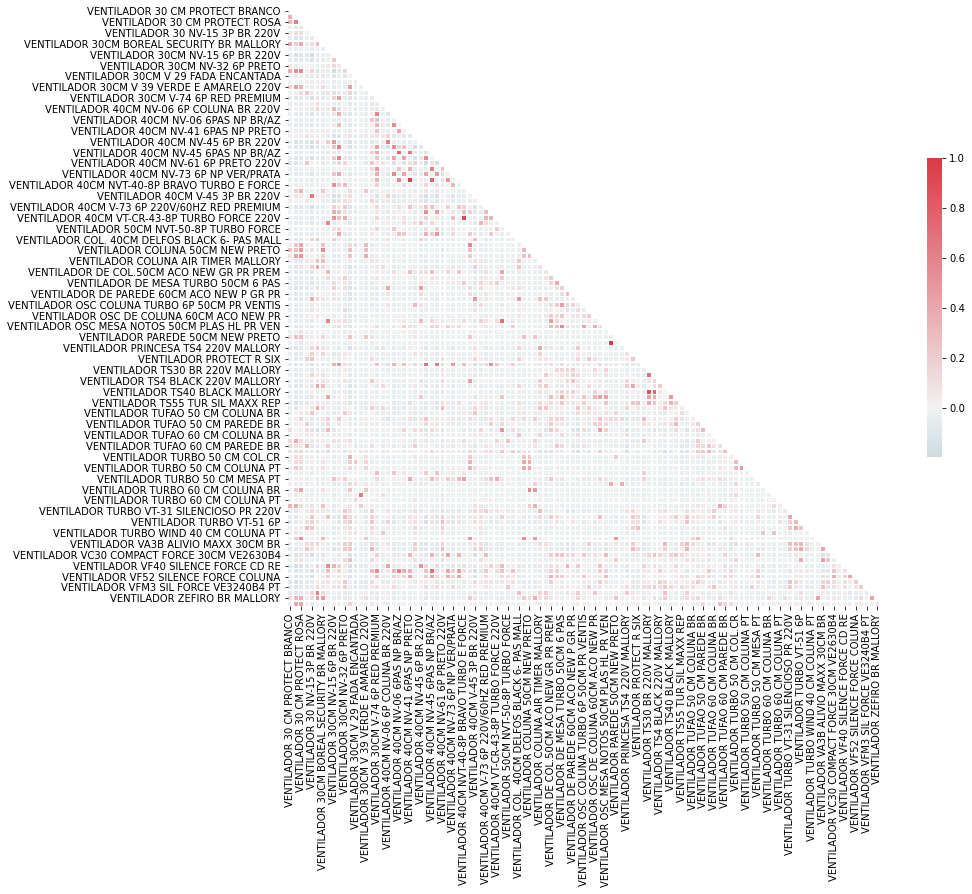

In [8]:
corr = dfw.corr()

# Apenas fazer a plotagem de metade da matriz, pois a matriz é simétrica
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize = (15, 11))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Desenhar a matriz de correlação usando heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})


A partir da análise da matriz de correlação pode-se notar que não há muitos pares com correlação forte, do tipo, acima de p>=0.7 . 

Pares com correlação forte (p >= 0.7): 9


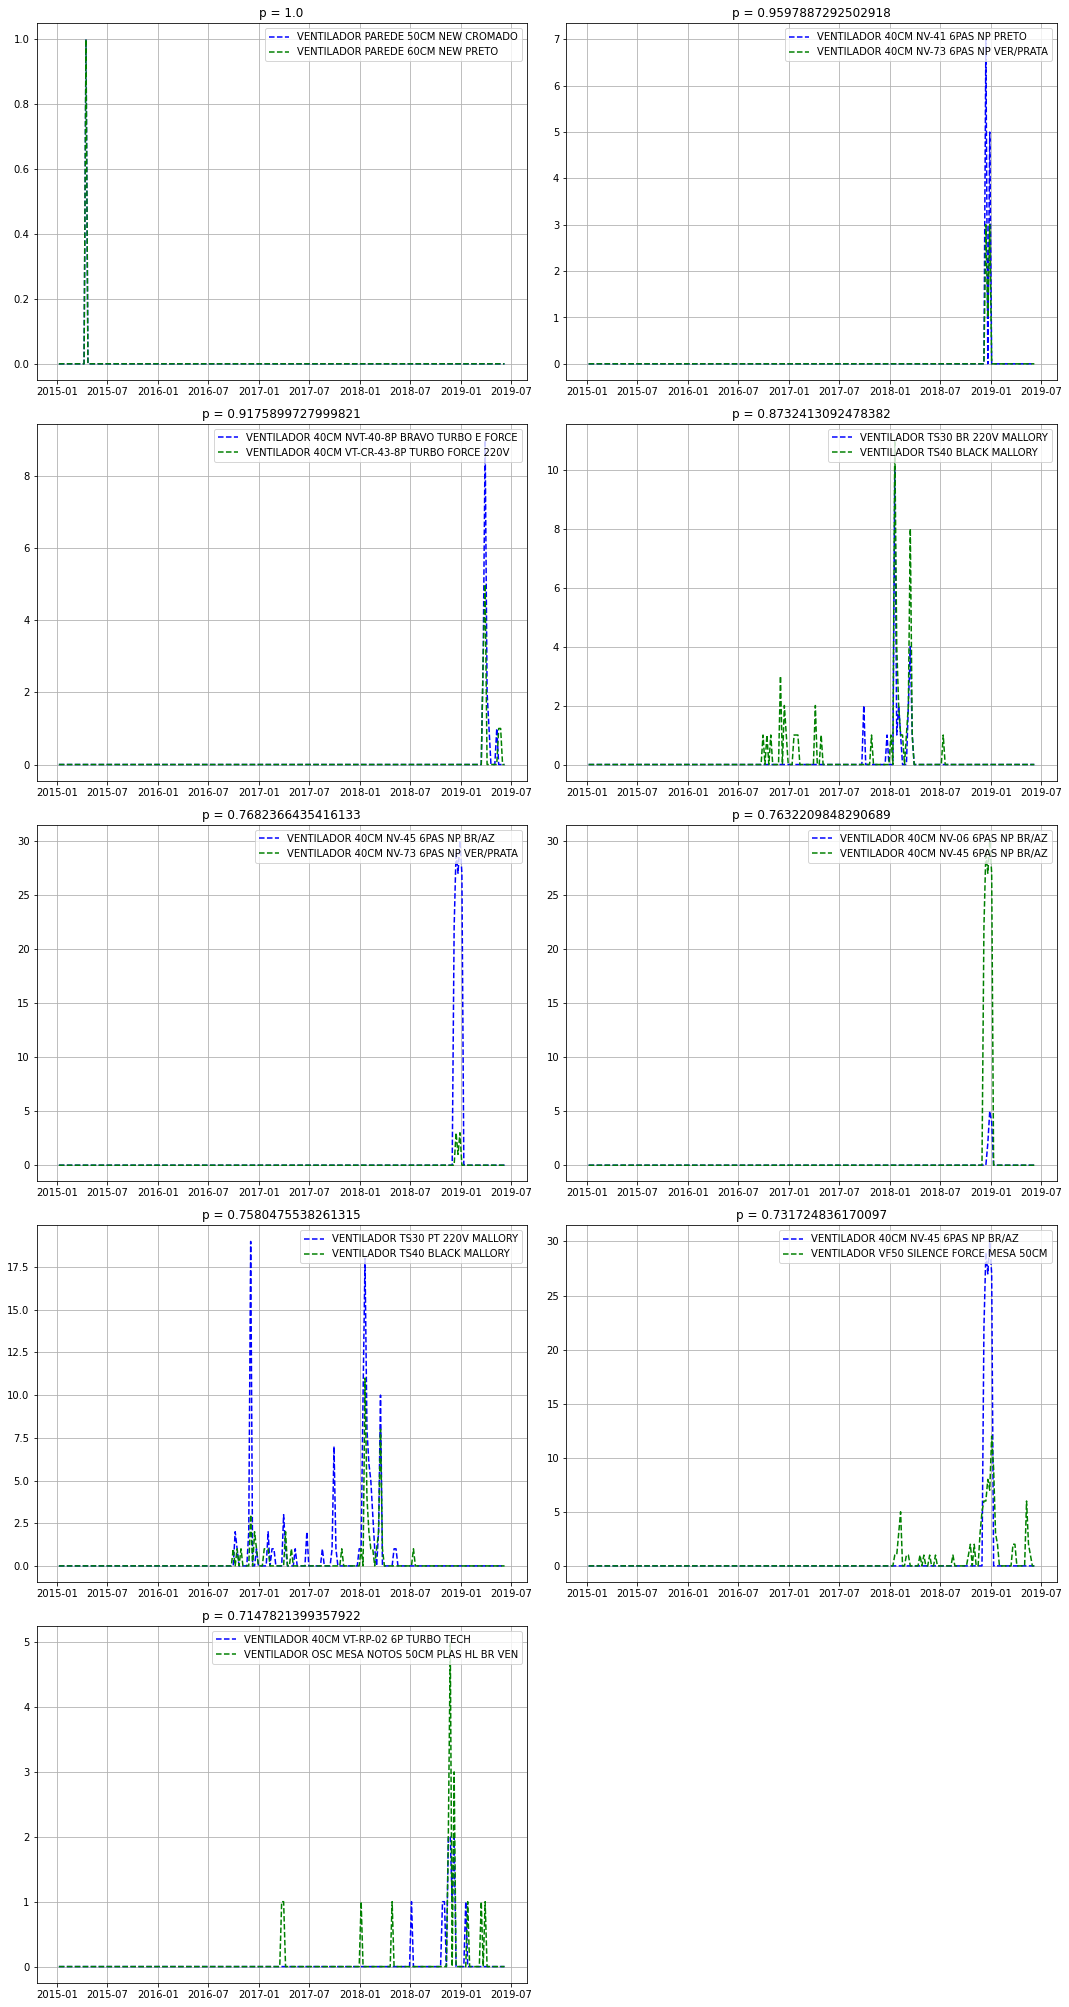

In [9]:
corr.loc[:,:] = np.tril(corr.values, k=-1)

s = corr.unstack()

so = s.sort_values(kind="quicksort", ascending=False)

plt.figure(figsize=(15,50))

num_s = len([x for x in so.tolist() if x >= 0.7])
print("Pares com correlação forte (p >= 0.7): %d" % num_s)

for i in range(num_s):
    plt.subplot(num_s, 2, i+1)
    plt.grid(True)
    plt.plot(dfw[so.index[i][0]], "b--", dfw[so.index[i][1]], "g--", label=so.index[i][0])
    plt.legend([so.index[i][0], so.index[i][1]], loc ='upper right')
    plt.title("p = " + str(so.values[i]))
plt.tight_layout()
plt.show()

Percebe-se uma correlação forte(p>=0.7) entre 9 pares. Em alguns gráficos as vendas se concentram em poucos semanas. Já em outros as vendas se estendem por mais tempo, apresentando vários picos. Nota-se que os picos acontecem no verão. 

Pares com correlação negativa (p <= 0.2): 0 


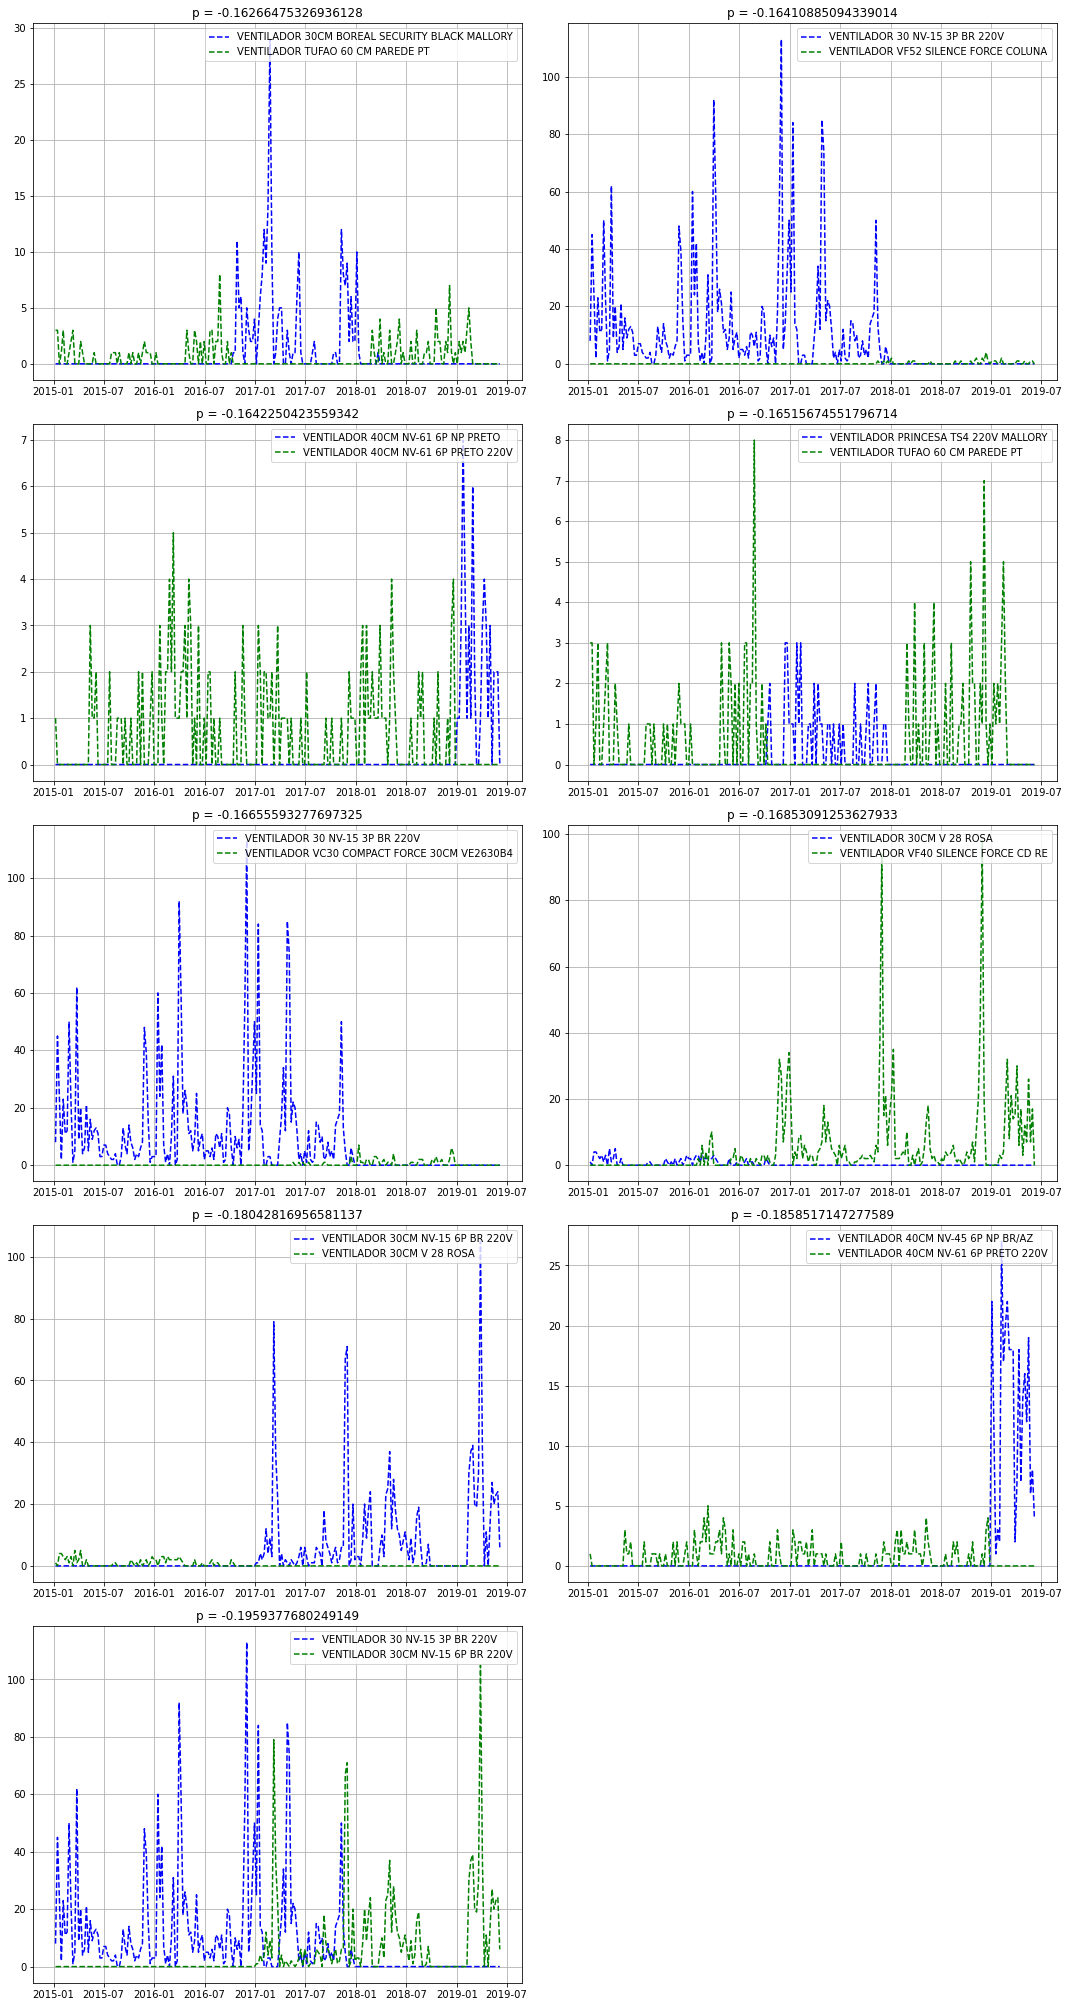

In [10]:
num_n = len([x for x in so.tolist() if x <= -0.2])

print("Pares com correlação negativa (p <= 0.2): %d " % num_n)
plt.figure(figsize=(15,50))

for i in range(len(so)-num_s, len(so)):
    plt.subplot(num_s, 2, i+1-len(so)+num_s)
    plt.grid(True)
    plt.plot(dfw[so.index[i][0]], "b--", dfw[so.index[i][1]], "g--", label=so.index[i][0])
    plt.legend([so.index[i][0], so.index[i][1]], loc ='upper right')
    plt.title("p = " + str(so.values[i]))
    
plt.tight_layout()
plt.show()

Já em relação as correlações negativas(p<=0.2) não foi encontrado nenhum par. Sendo assim nenhum modelo será incorporado um ao outro para formar uma nova categoria.  Alguns modelos apresentam vendas constantes, apresentando picos de venda no período mais quente do ano.






/home/luyza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



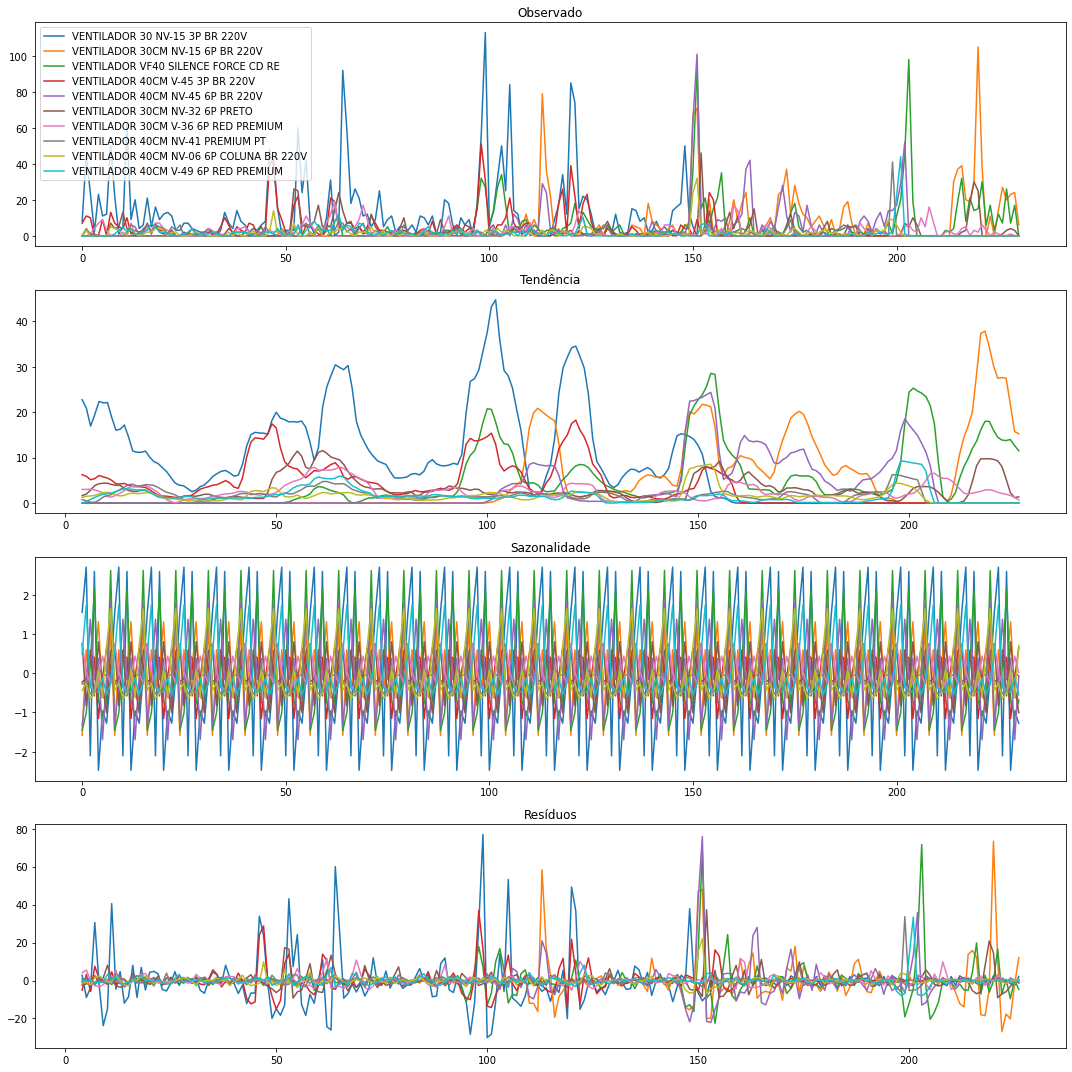

In [11]:
def plot_decompose(products, model='additive', period=8):
    result = seasonal_decompose(dfw[products].values, model=model, freq=period)
    #Cria 4 figs
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize =(15,15))
    #Plota
    ax1.plot(result.observed)
    ax1.legend(products, loc='upper left')
    ax1.title.set_text('Observado')
    ax2.plot(result.trend)
    ax2.title.set_text('Tendência')
    ax3.plot(result.seasonal)
    ax3.title.set_text('Sazonalidade')
    ax4.plot(result.resid)
    ax4.title.set_text('Resíduos')

    plt.tight_layout()
    
products = ['VENTILADOR 30 NV-15 3P BR 220V', 'VENTILADOR 30CM NV-15 6P BR 220V', 'VENTILADOR VF40 SILENCE FORCE CD RE','VENTILADOR 40CM V-45 3P BR 220V','VENTILADOR 40CM NV-45 6P BR 220V', 'VENTILADOR 30CM NV-32 6P PRETO', 'VENTILADOR 30CM V-36 6P RED PREMIUM', 'VENTILADOR 40CM NV-41 PREMIUM PT', 'VENTILADOR 40CM NV-06 6P COLUNA BR 220V', 'VENTILADOR 40CM V-49 6P RED PREMIUM']
plot_decompose(products)

A partir  do gráfico da série temporal é possível notar que os produtos apresentam muitas vendas, apresentados os seus picos na época dos períodos mais quentes, final do segundo semestre e início do novo semestre. Ou seja, no período do verão. Diferentes dos outros produtos(smartphones, geladeiras, televisores) os ventiladores mostram que  a sazonalidade interfere diretamente em suas vendas. Fora desse período as vendas apresentam quedas em momentos específicos.


# Previsão de vendas utilizando a API Prophet

Adição dos feriados

In [12]:
mothers = pd.DataFrame({
    'holiday': 'Dia das mães',
    'ds': ['2015-05-10', '2016-05-08', '2017-05-14', '2018-05-13', '2019-05-12'],
    'lower_window': -7,
    'upper_window': 0
})
fathers = pd.DataFrame({
    'holiday': 'Dia dos pais',
    'ds': ['2015-08-09', '2016-08-14', '2017-08-13', '2018-08-12', '2019-08-11'],
    'lower_window': -7,
    'upper_window': 0
})
valentines = pd.DataFrame({
    'holiday': 'Dia dos namorados',
    'ds': ['2015-06-12', '2016-06-12', '2017-06-12', '2018-06-12', '2018-06-12'],
    'lower_window': -7,
    'upper_window': 0
})
christmas = pd.DataFrame({
    'holiday': 'Natal',
    'ds': ['2015-12-25', '2016-12-25', '2017-12-25', '2018-12-25', '2019-12-25'],
    'lower_window': -8, # Incluindo a véspera
    'upper_window': 0
})
bf = pd.DataFrame({
    'holiday': 'Black friday',
    'ds': ['2015-11-27', '2016-11-25', '2017-11-24', '2018-11-25', '2019-11-24'],
    'lower_window': -7,
    'upper_window': 0
})
childrens = pd.DataFrame({
    'holiday': 'Dia das crianças',
    'ds': ['2015-10-12', '2016-10-12', '2017-10-12', '2018-10-12', '2019-10-12'],
    'lower_window': -7,
    'upper_window': 0
})
easter = pd.DataFrame({
    'holiday': 'Páscoa',
    'ds': ['2015-04-05', '2016-03-27', '2017-04-16', '2018-04-01', '2019-04-21'], # Domingo de páscoa
    'lower_window': -7,
    'upper_window': 0
})
new_year = pd.DataFrame({
    'holiday': 'Ano Novo',
    'ds': ['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'],
    'lower_window': -8, # Adicionar a véspera
    'upper_window': 0
})
carnival = pd.DataFrame({
    'holiday': 'Carnaval',
    'ds': ['2015-02-18', '2016-02-10', '2017-03-01', '2018-02-14', '2019-03-06'], # Quarta feira de cinzas
    'lower_window': -7, # Adicionar a véspera
    'upper_window': 0
})

holidays = pd.concat((mothers, fathers, valentines, christmas, bf, childrens, easter, new_year))

In [13]:
def createProphetDataFrame(column, df):
    df2 = pd.DataFrame({'ds': df.index, 'y':df[column].values})
    df2['floor'] = 0

    return df2

def size_train(df):
    return len(df[:'2018-01-01'])

def size_test(df):
    return len(df['2018-01-01':])    

In [14]:
forecasts = []
for product in products:
    ph = Prophet(daily_seasonality=False, holidays=holidays, growth='flat', yearly_seasonality=8, weekly_seasonality=False)
    ph.fit(createProphetDataFrame(product, dfw)[:size_train(dfw)])

    future = ph.make_future_dataframe(periods=size_test(dfw), freq='W-THU')
    forecasts.append(ph.predict(future))

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = []
mad = []

for forecast in forecasts:
    i = 0
    mse.append(mean_squared_error(dfw[products[i]][size_train(dfw):], forecast['yhat'][size_train(dfw):]))
    mad.append(mean_absolute_error(dfw[products[i]][size_train(dfw):], forecast['yhat'][size_train(dfw):]))
    i += 1

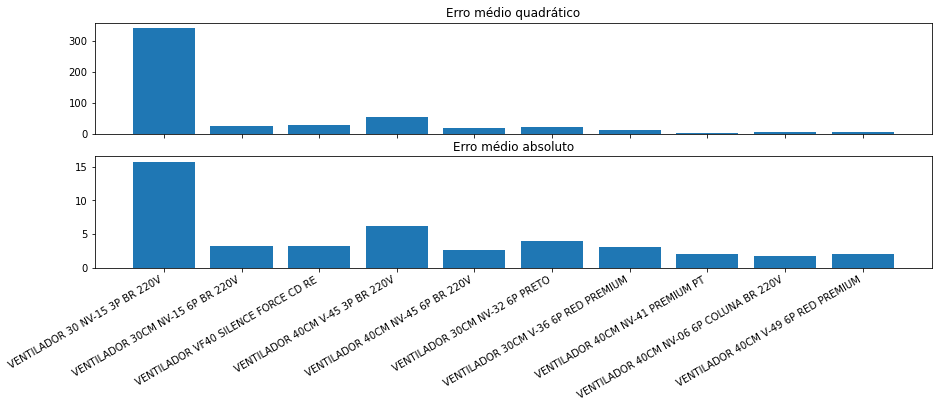

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 5))

ax1.bar(height=mse, x=products)
ax1.title.set_text('Erro médio quadrático')

ax2.bar(height=mad, x=products)
ax2.title.set_text('Erro médio absoluto')

fig.autofmt_xdate()
plt.show()    

Novamente fazendo o uso do modelo Prophet com os feriados adicionados ao modelos, obteve-se o erro médio quadrático e o erro médio absoluto

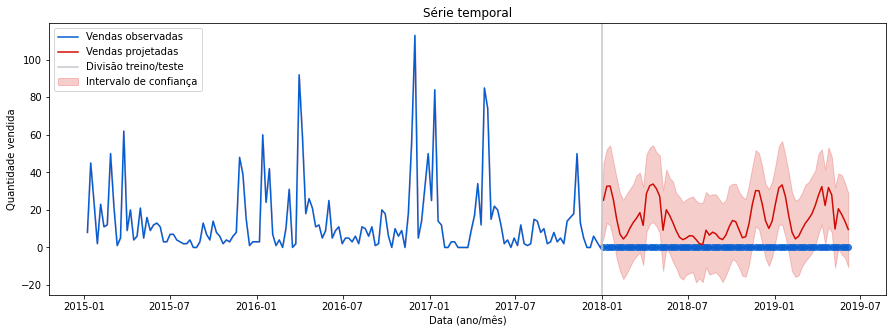

In [17]:
forecast = forecasts[0]
forecast.index = pd.to_datetime(forecast['ds'])
conf = pd.DataFrame({'low': pd.concat([dfw['VENTILADOR 30 NV-15 3P BR 220V'][:'2018-01-01'], forecast['yhat_lower']['2018-01-01':]]),
                     'upper': pd.concat([dfw['VENTILADOR 30 NV-15 3P BR 220V'][:'2018-01-01'], forecast['yhat_upper']['2018-01-01':]])})
plt.figure(figsize = (15, 5))
plt.plot(dfw['VENTILADOR 30 NV-15 3P BR 220V'][:'2018-01-01'], color='#045dd1', label='Vendas observadas')
plt.plot(dfw['VENTILADOR 30 NV-15 3P BR 220V']['2018-01-01':], 'o', alpha=0.8, color='#045dd1')
plt.plot(forecast['yhat']['2018-01-01':], color='#d10b04', label='Vendas projetadas')
plt.axvline(x=pd.to_datetime('2018-01-01'), color='#c4c7cc', label='Divisão treino/teste')
plt.fill_between(dfw.index, y1=conf['low'], y2=conf['upper'], alpha = 0.2, color='#d10b04', label='Intervalo de confiança')
plt.xlabel('Data (ano/mês)')
plt.ylabel('Quantidade vendida')
plt.title('Série temporal')
plt.legend(loc='upper left')

Novamente fazendo o uso da série temporal do modelo de ventilador mais vendido, VENTILADOR 30 NV-15 3P BR 220V, é possível obter o gráfico acima. Só que este gráfico não apresenta vendas. Pode-se deduzir que depois do período de 2018-01 o produto deixa de ter vendas.  


Sendo assim, foi analisado o segundo produto mais vendido, o VENTILADOR 30CM NV-15 6P BR 220V. 


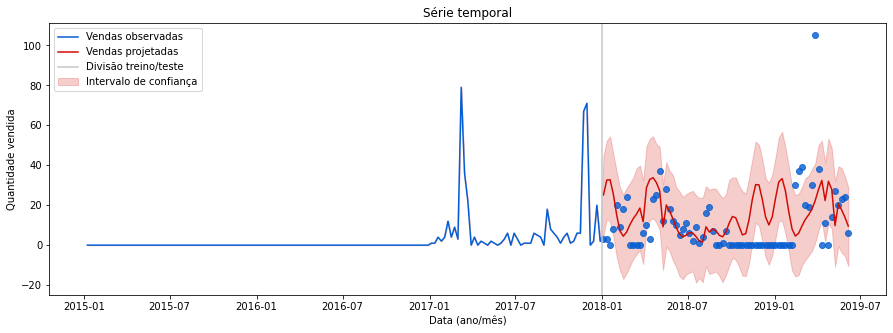

In [18]:
forecast = forecasts[0]
forecast.index = pd.to_datetime(forecast['ds'])
conf = pd.DataFrame({'low': pd.concat([dfw['VENTILADOR 30CM NV-15 6P BR 220V'][:'2018-01-01'], forecast['yhat_lower']['2018-01-01':]]),
                     'upper': pd.concat([dfw['VENTILADOR 30CM NV-15 6P BR 220V'][:'2018-01-01'], forecast['yhat_upper']['2018-01-01':]])})
plt.figure(figsize = (15, 5))
plt.plot(dfw['VENTILADOR 30CM NV-15 6P BR 220V'][:'2018-01-01'], color='#045dd1', label='Vendas observadas')
plt.plot(dfw['VENTILADOR 30CM NV-15 6P BR 220V']['2018-01-01':], 'o', alpha=0.8, color='#045dd1')
plt.plot(forecast['yhat']['2018-01-01':], color='#d10b04', label='Vendas projetadas')
plt.axvline(x=pd.to_datetime('2018-01-01'), color='#c4c7cc', label='Divisão treino/teste')
plt.fill_between(dfw.index, y1=conf['low'], y2=conf['upper'], alpha = 0.2, color='#d10b04', label='Intervalo de confiança')
plt.xlabel('Data (ano/mês)')
plt.ylabel('Quantidade vendida')
plt.title('Série temporal')
plt.legend(loc='upper left')

Nota-se que as vendas projetadas levam em conta que este produto depende um pouco da sazonalidade. Vemos  que no período (2018-07 a 2019-01) este produto não apresenta tantas vendas.  Mas no período de 2018-01 e a partir de 2019-01/2019-02 começam novamente as vendas.  


### Previsão por mês

Aumentar a granularidade pode fornecer uma previsão mais precisa.


Foi treinado outro modelo para que a previsão das vendas fosse realizada mensalmente. Com o intuito de evitar os buracos com as vendas, quando essas são retratadas semanalmente.

In [19]:
dfm = df.resample('M').sum()  

forecastsm = []
for product in products:
    ph = Prophet(daily_seasonality=False, growth='flat', yearly_seasonality=8, weekly_seasonality=False)
    ph.fit(createProphetDataFrame(product, dfm)[:size_train(dfm)])

    future = ph.make_future_dataframe(periods=size_test(dfm), freq='M')
    forecastsm.append(ph.predict(future))

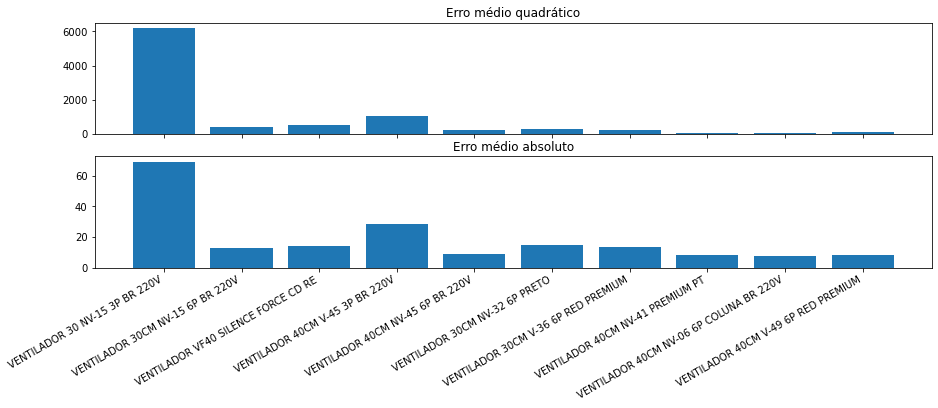

In [20]:
msem = []
madm = []

for forecast in forecastsm:
    i = 0
    msem.append(mean_squared_error(dfm[products[i]][size_train(dfm):], forecast['yhat'][size_train(dfm):]))
    madm.append(mean_absolute_error(dfm[products[i]][size_train(dfm):], forecast['yhat'][size_train(dfm):]))
    i += 1
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 5))

ax1.bar(height=msem, x=products)
ax1.title.set_text('Erro médio quadrático')

ax2.bar(height=madm, x=products)
ax2.title.set_text('Erro médio absoluto')

fig.autofmt_xdate()
plt.show()   

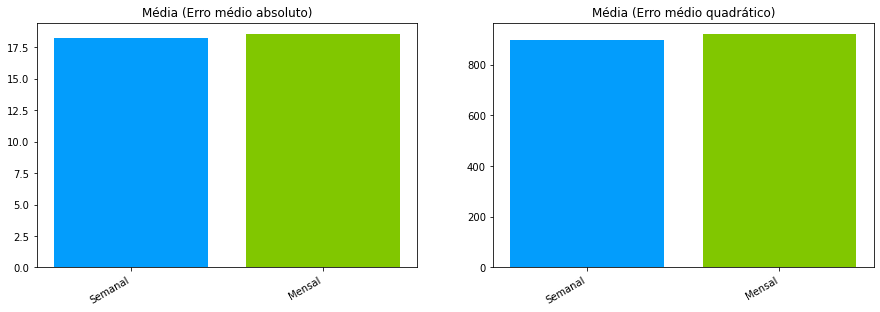

In [21]:
mse = []
mad = []

for forecast in forecasts:
    forecast = forecast.set_index('ds').resample('M').sum()
    i = 0
    mse.append(mean_squared_error(dfm[products[i]][size_train(dfm):], forecast['yhat'][size_train(dfm):-1]))
    mad.append(mean_absolute_error(dfm[products[i]][size_train(dfm):], forecast['yhat'][size_train(dfm):-1]))
    i += 1
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(height=[np.mean(mad), np.mean(madm)], x=['Semanal', 'Mensal'], color=('#039dfc', '#81c700'))
ax1.title.set_text('Média (Erro médio absoluto)')

ax2.bar(height=[np.mean(mse), np.mean(msem)], x=['Semanal', 'Mensal'], color=('#039dfc', '#81c700'))
ax2.title.set_text('Média (Erro médio quadrático)')

fig.autofmt_xdate()
plt.show()   

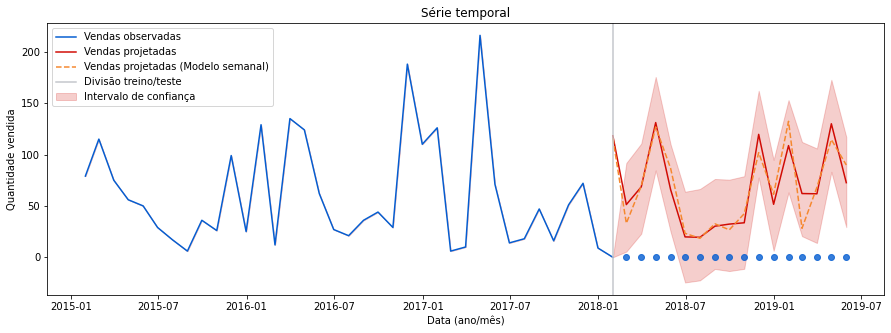

In [22]:
forecast = forecastsm[0]
forecastw = forecasts[0].set_index('ds').resample('M').sum()
forecast.index = pd.to_datetime(forecast['ds'])
conf = pd.DataFrame({'low': pd.concat([dfm['VENTILADOR 30 NV-15 3P BR 220V'][:'2018-02-01'], forecast['yhat_lower']['2018-02-01':]]),
                     'upper': pd.concat([dfm['VENTILADOR 30 NV-15 3P BR 220V'][:'2018-02-01'], forecast['yhat_upper']['2018-02-01':]])})
plt.figure(figsize = (15, 5))
plt.plot(dfm['VENTILADOR 30 NV-15 3P BR 220V'][:'2018-01-31'], color='#045dd1', label='Vendas observadas')
plt.plot(dfm['VENTILADOR 30 NV-15 3P BR 220V']['2018-02-01':], 'o', alpha=0.8, color='#045dd1')
plt.plot(forecast['yhat']['2018-01-01':], color='#d10b04', label='Vendas projetadas')
plt.plot(forecastw['yhat']['2018-01-01':'2019-06-01'], '--', color='#f5882f', label='Vendas projetadas (Modelo semanal)')
plt.axvline(x=pd.to_datetime('2018-01-31'), color='#c4c7cc', label='Divisão treino/teste')
plt.fill_between(dfm.index, y1=conf['low'], y2=conf['upper'], alpha = 0.2, color='#d10b04', label='Intervalo de confiança')
plt.xlabel('Data (ano/mês)')
plt.ylabel('Quantidade vendida')
plt.title('Série temporal')
plt.legend(loc='upper left')

Sendo assim, novamente, a partir da série temporal(desta vez a mensal), foi obtido o gráfico do produto mais vendido VENTILADOR 30 NV-15 3P BR 220V. 

Novamente não há vendas deste modelo. Então o segundo modelo que teve mais vendas será analisado, o VENTILADOR 30CM NV-15 6P BR 220V 

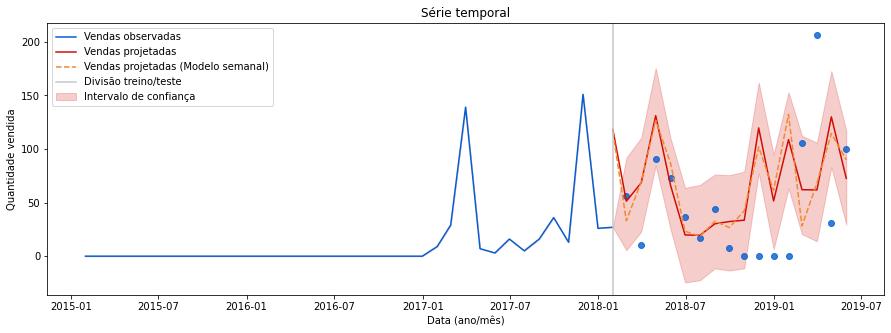

In [23]:
forecast = forecastsm[0]
forecastw = forecasts[0].set_index('ds').resample('M').sum()
forecast.index = pd.to_datetime(forecast['ds'])
conf = pd.DataFrame({'low': pd.concat([dfm['VENTILADOR 30CM NV-15 6P BR 220V'][:'2018-02-01'], forecast['yhat_lower']['2018-02-01':]]),
                     'upper': pd.concat([dfm['VENTILADOR 30CM NV-15 6P BR 220V'][:'2018-02-01'], forecast['yhat_upper']['2018-02-01':]])})
plt.figure(figsize = (15, 5))
plt.plot(dfm['VENTILADOR 30CM NV-15 6P BR 220V'][:'2018-01-31'], color='#045dd1', label='Vendas observadas')
plt.plot(dfm['VENTILADOR 30CM NV-15 6P BR 220V']['2018-02-01':], 'o', alpha=0.8, color='#045dd1')
plt.plot(forecast['yhat']['2018-01-01':], color='#d10b04', label='Vendas projetadas')
plt.plot(forecastw['yhat']['2018-01-01':'2019-06-01'], '--', color='#f5882f', label='Vendas projetadas (Modelo semanal)')
plt.axvline(x=pd.to_datetime('2018-01-31'), color='#c4c7cc', label='Divisão treino/teste')
plt.fill_between(dfm.index, y1=conf['low'], y2=conf['upper'], alpha = 0.2, color='#d10b04', label='Intervalo de confiança')
plt.xlabel('Data (ano/mês)')
plt.ylabel('Quantidade vendida')
plt.title('Série temporal')
plt.legend(loc='upper left')